# Correlation function of DR72 SDSS VAGC Catalog

First import all the modules such as healpy and astropy needed for analyzing the structure

In [1]:
import healpix_util as hu
import astropy as ap
import numpy as np
from astropy.io import fits
from astropy.table import Table
import astropy.io.ascii as ascii
from astropy.io import fits
from astropy.constants import c
import matplotlib.pyplot as plt
import math as m
from math import pi
#from scipy.constants import c
import scipy.special as sp
from astroML.decorators import pickle_results
from scipy import integrate
import warnings
from sklearn.neighbors import BallTree
import pickle
import multiprocessing as mp
import time
from lco07metric import *
from progressbar import *
from tqdm import *
from functools import partial
import pymangle
#from astroML.datasets import fetch_sdss_specgals
#from astroML.correlation import bootstrap_two_point_angular
%matplotlib inline

In [2]:
# Getting back the objects:
with open('datsLCf.pkl') as f:  # Python 3: open(..., 'rb')
    dat = pickle.load(f)
dat

array([[ 0.37169 ,  0.980185, -0.003863],
       [ 0.312739,  1.016617,  0.003776],
       [ 0.345944,  0.950251,  0.010821],
       ..., 
       [ 0.290404,  2.829918,  0.173514],
       [ 0.313432,  2.830242,  0.172112],
       [ 0.199924,  2.831786,  0.173661]])

In [3]:
bins=np.arange(0.,0.08,0.005)

In [4]:
print bins

[ 0.     0.005  0.01   0.015  0.02   0.025  0.03   0.035  0.04   0.045
  0.05   0.055  0.06   0.065  0.07   0.075]


In [5]:
Nbins=len(bins)

In [6]:
Nbins

16

In [7]:
binsq=(bins*0.007)**2

In [8]:
binsq

array([  0.00000000e+00,   1.22500000e-09,   4.90000000e-09,
         1.10250000e-08,   1.96000000e-08,   3.06250000e-08,
         4.41000000e-08,   6.00250000e-08,   7.84000000e-08,
         9.92250000e-08,   1.22500000e-07,   1.48225000e-07,
         1.76400000e-07,   2.07025000e-07,   2.40100000e-07,
         2.75625000e-07])

In [10]:
LCometric07(dat[0],dat[1])

1.781583356269078e-07

In [11]:
%%time
BT_DLCo = BallTree(dat,metric='pyfunc',func=LCometric07,leaf_size=5) 

with open('BTDdatsLCo07.pkl', 'w') as f:
    pickle.dump(BT_DLCo,f)

CPU times: user 6.45 s, sys: 76.9 ms, total: 6.53 s
Wall time: 6.65 s


In [12]:
with open('BTDdatsLCo07.pkl') as f:
    BTDLCo = pickle.load(f)
    
BTDLCo

In [13]:
%%time
start_time=time.time()
counts_DD=BTDLCo.two_point_correlation(dat,binsq)
print counts_DD
end_time=time.time()
tottime=end_time-start_time
print "Total run time:"
print tottime

with open('BTDcDDLCo07.pkl', 'w') as f:
    pickle.dump(counts_DD,f)

[   103744    435025   1551330   4079261   8763916  16347206  27560814
  43056907  63393150  88989951 120248171 157518583 201151426 251505218
 308866081 373489442]
Total run time:
1349.90365291
CPU times: user 18min 5s, sys: 631 ms, total: 18min 5s
Wall time: 22min 29s


In [14]:
with open('BTDcDDLCo07.pkl') as f:
    counts_DD = pickle.load(f)
    
counts_DD

array([   103744,    435025,   1551330,   4079261,   8763916,  16347206,
        27560814,  43056907,  63393150,  88989951, 120248171, 157518583,
       201151426, 251505218, 308866081, 373489442])

In [15]:
DD=np.diff(counts_DD)

In [16]:
DD

array([  331281,  1116305,  2527931,  4684655,  7583290, 11213608,
       15496093, 20336243, 25596801, 31258220, 37270412, 43632843,
       50353792, 57360863, 64623361])

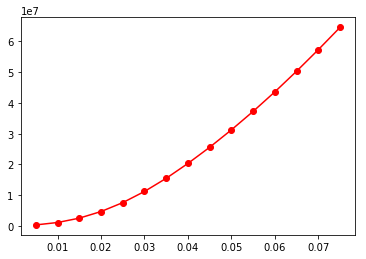

In [17]:
plt.plot(bins[1:len(bins)],DD,'ro-')

BallTree.two_point_correlation works almost 10 times faster! with leaf_size=5 Going with it to the random catalog

In [18]:
# Getting back the objects:
with open('rDR7200kLCsrarf.pkl') as f:  # Python 3: open(..., 'rb')
    datR = pickle.load(f)
datR

array([[ 0.37169 ,  2.992549,  0.248026],
       [ 0.312739,  2.737752,  0.711236],
       [ 0.345944,  2.367643,  0.341962],
       ..., 
       [ 0.311286,  3.228052,  0.199013],
       [ 0.283066,  3.218296,  0.052979],
       [ 0.188215,  4.056418,  0.170602]])

In [19]:
%%time
BT_RLCo = BallTree(datR,metric='pyfunc',func=LCometric07,leaf_size=5) 

with open('BTR200kdatsLCo07.pkl', 'w') as f:
    pickle.dump(BT_RLCo,f)

CPU times: user 12.4 s, sys: 108 ms, total: 12.5 s
Wall time: 12.7 s


In [20]:
with open('BTR200kdatsLCo07.pkl') as f:
    BTRLCo = pickle.load(f)
    
BTRLCo

In [21]:
%%time
start_time=time.time()
counts_RR=BTRLCo.two_point_correlation(datR,binsq)
print counts_RR
end_time=time.time()
tottime=end_time-start_time
print "Total run time:"
print tottime

with open('BTR200kcRRLCo07.pkl', 'w') as f:
    pickle.dump(counts_RR,f)

[    202159     749815    4261628   13636493   31875354   61567045
  104944962  164204504  241704541  339717638  459986498  603852978
  771786451  964296405 1182565588 1428054195]
Total run time:
2988.938977
CPU times: user 49min 37s, sys: 5.76 s, total: 49min 43s
Wall time: 49min 48s


In [22]:
with open('BTR200kcRRLCo07.pkl') as f:
    counts_RR = pickle.load(f)
    
counts_RR

array([    202159,     749815,    4261628,   13636493,   31875354,
         61567045,  104944962,  164204504,  241704541,  339717638,
        459986498,  603852978,  771786451,  964296405, 1182565588,
       1428054195])

In [23]:
RR=np.diff(counts_RR)

In [24]:
RR

array([   547656,   3511813,   9374865,  18238861,  29691691,  43377917,
        59259542,  77500037,  98013097, 120268860, 143866480, 167933473,
       192509954, 218269183, 245488607])

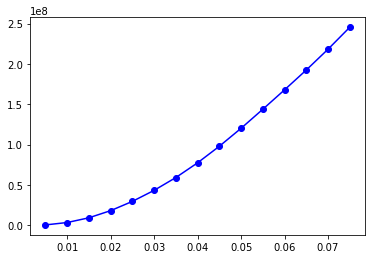

In [25]:
plt.plot(bins[1:len(bins)],RR,'bo-')

In [26]:
RR_zero = (RR == 0)
RR[RR_zero] = 1

In [27]:
%%time
start_time=time.time()
counts_DR=BTRLCo.two_point_correlation(dat,binsq)
print counts_DR
end_time=time.time()
tottime=end_time-start_time
print "Total run time:"
print tottime

with open('BTR200kcDRLCo07.pkl', 'w') as f:
    pickle.dump(counts_DR,f)

[      191    259636   1983729   6633849  15704984  30478629  52128625
  81773845 120687567 170040463 230726814 303540856 388693788 486504627
 597612181 722921861]
Total run time:
1353.51121497
CPU times: user 22min 31s, sys: 1.25 s, total: 22min 32s
Wall time: 22min 33s


In [28]:
with open('BTR200kcDRLCo07.pkl') as f:
    counts_DR = pickle.load(f)
    
counts_DR

array([      191,    259636,   1983729,   6633849,  15704984,  30478629,
        52128625,  81773845, 120687567, 170040463, 230726814, 303540856,
       388693788, 486504627, 597612181, 722921861])

In [42]:
DR=np.diff(counts_DR)

In [43]:
DR

array([   259445,   1724093,   4650120,   9071135,  14773645,  21649996,
        29645220,  38913722,  49352896,  60686351,  72814042,  85152932,
        97810839, 111107554, 125309680])

In [44]:
corrells=(4.0 * DD - 4.0 * DR + RR) / RR

In [45]:
corrells

array([ 1.52467973,  0.30772168,  0.09451965,  0.03799256,  0.03133102,
        0.03763124,  0.04493848,  0.04116283,  0.03049304,  0.02125518,
        0.01176063,  0.01103483,  0.01393053,  0.0150384 ,  0.01117498])

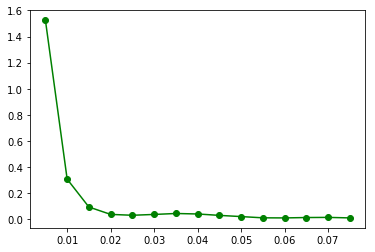

In [33]:
plt.plot(bins[1:len(bins)],corrells,'go-')

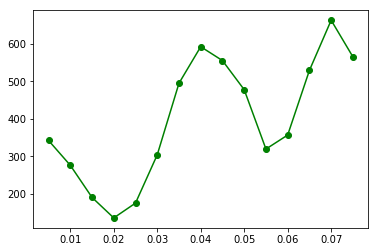

In [34]:
plt.plot(bins[1:len(bins)],bins[1:len(bins)]*bins[1:len(bins)]*corrells*(c*1e-5)**2,'go-')

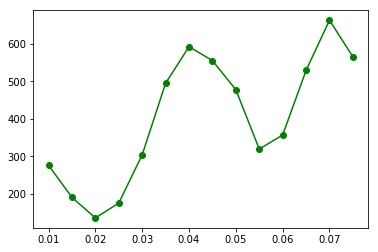

In [35]:
plt.plot(bins[2:len(bins)],bins[2:len(bins)]*bins[2:len(bins)]*corrells[1:len(bins)]*(c*1e-5)**2,'go-')

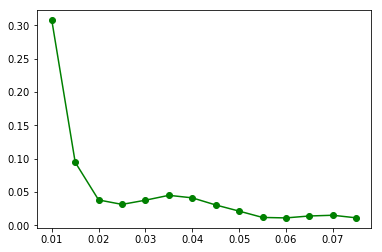

In [36]:
plt.plot(bins[2:len(bins)],corrells[1:len(bins)],'go-')

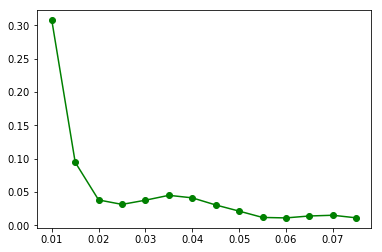

In [37]:
plt.plot(bins[2:len(bins)],corrells[1:len(bins)],'go-')
plt.savefig("correl2xlsLCo07.pdf")

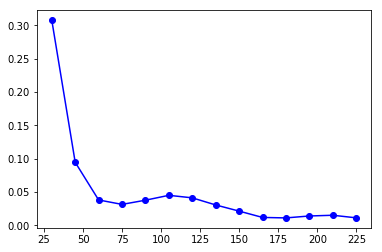

In [38]:
plt.plot(bins[2:len(bins)]*c/1e5,corrells[1:len(bins)],'bo-')
plt.savefig("correl2x1lsLCo07.pdf")

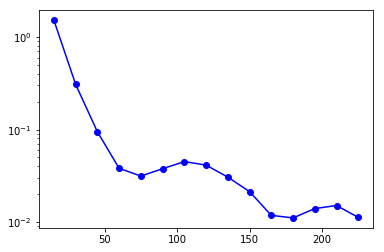

In [39]:
plt.yscale('log')
plt.plot(bins[1:len(bins)]*c/1e5,corrells,'bo-')
plt.savefig("correllsfiglogLCo07.pdf")

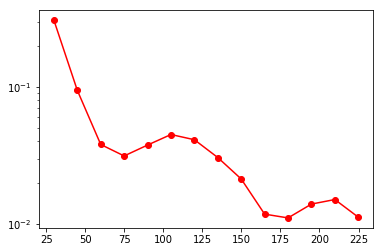

In [40]:
plt.yscale('log')
plt.plot(bins[2:len(bins)]*c/1e5,corrells[1:len(bins)],'ro-')
plt.savefig("correllslog2xLCo07.pdf")

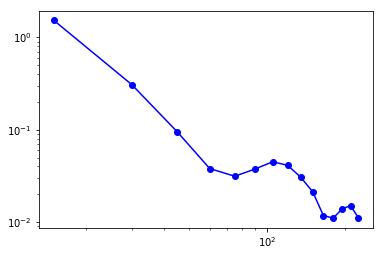

In [41]:
plt.yscale('log')
plt.xscale('log')
plt.plot(bins[1:len(bins)]*c/1e5,corrells,'bo-')
plt.savefig("correllsloglogLCo07.pdf")